In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.formula.api import ols
from nltk.sentiment import SentimentIntensityAnalyzer
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 1. Import Data

In [2]:
# netflix_titles
df1 = pd.read_csv('netflix_titles.csv')

df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [3]:
# netflix_titles_2
df2 = pd.read_csv('netflix_titles_2.csv')

df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [4]:
# netflix_titles_2
df3 = pd.read_csv('netflix_titles_3.csv')

df3

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### 1.1 Conbine data

In [5]:
# as we want to figure out what characteristic may influence the popularity, columns like 'show_id' and 'title' are meaningless, so drop them to simplify the dataframe
df1 = df1.drop(columns = ['show_id', 'title'])
df2 = df2.drop(columns = ['show_id', 'title'])
df3 = df3.drop(columns = ['show_id', 'title'])

In [6]:
frames = [df1, df2, df3]
# frames = [df1, df2]
df0 = pd.concat(frames).drop_duplicates()

df0

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
5648,Movie,"Steve Hickner, Simon J. Smith","Jerry Seinfeld, Renée Zellweger, Matthew Brode...",United States,"January 1, 2017",2007,PG,92 min,"Children & Family Movies, Comedies","Barry, a worker bee stuck in a dead-end job ma..."
5794,Movie,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
5851,Movie,"Felix Van Groeningen, Felix van Groeningen","Stef Aerts, Tom Vermeir, Charlotte Vandermeers...","Belgium, France, Netherlands","April 15, 2016",2016,TV-MA,127 min,"Dramas, International Movies",Two brothers become partners in a modest night...


In [7]:
#df0.fillna('None', inplace = True)
print(df0.shape)

(11072, 10)


### 1.2 Look at data

In [8]:
# check the number of missing values in the dataframe
df0.isnull().sum()

type               0
director        3829
cast            1025
country         1083
date_added        11
release_year       0
rating            10
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

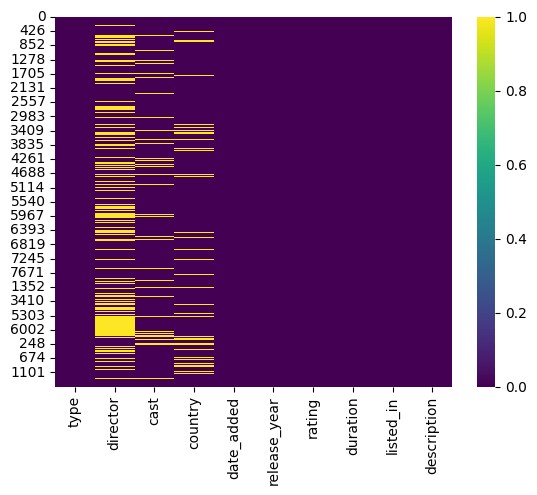

In [9]:
# more intuitively to look at missing data 
sns.heatmap(df0.isnull(), cmap = 'viridis')

## 2. Data Preprocessing

### 2.1 Deal with missing data

In [10]:
# There are too many missing values in the 'director' column, and this attribute is not that important for our analysis, so we decide to drop this column as well.
# Similarly, there are more than 5% of data with missing value in cast, so we drop it first. (If we have time, we will think about how to process it.)
df0 = df0.drop(columns = ['director', 'cast'])

df0.head()

,type,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
# replace all null values in 'country' with 'Others'
df0['country'].replace(np.nan, 'Other',inplace  = True)

In [12]:
# Similarly, we may replace the null values in 'rating' by the rating which indicates unlabeled
df0['rating'].replace(np.nan, 'NR',inplace  = True)

In [13]:
# drop rows of data with missing value in date_added
df0.dropna(subset=['date_added', 'duration'], inplace=True)
df0

,type,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...
5554,TV Show,Other,"March 31, 2017",2017,TV-MA,1 Season,Docuseries,Five acclaimed contemporary directors tell the...
5610,Movie,"United Kingdom, United States","February 10, 2017",2016,TV-MA,97 min,"Comedies, International Movies, Music & Musicals","With ""The Office"" long in the past, middling s..."
5648,Movie,United States,"January 1, 2017",2007,PG,92 min,"Children & Family Movies, Comedies","Barry, a worker bee stuck in a dead-end job ma..."
5851,Movie,"Belgium, France, Netherlands","April 15, 2016",2016,TV-MA,127 min,"Dramas, International Movies",Two brothers become partners in a modest night...


In [14]:
# check whether there are null values in the dataframe
df0.isnull().sum()

type            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 2.2 Identify unreasonable value

In [15]:
# Rating

# Step 1: Inspect unique values
unique_ratings = df0['rating'].unique()
print("Unique ratings:", unique_ratings)

Unique ratings: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


In [16]:
# Step 2: Identify and handle anomalies
df0 = df0[df0['rating'] != '74 min']  
df0 = df0[df0['rating'] != '84 min']  
df0 = df0[df0['rating'] != '66 min']  

df0

,type,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...
5554,TV Show,Other,"March 31, 2017",2017,TV-MA,1 Season,Docuseries,Five acclaimed contemporary directors tell the...
5610,Movie,"United Kingdom, United States","February 10, 2017",2016,TV-MA,97 min,"Comedies, International Movies, Music & Musicals","With ""The Office"" long in the past, middling s..."
5648,Movie,United States,"January 1, 2017",2007,PG,92 min,"Children & Family Movies, Comedies","Barry, a worker bee stuck in a dead-end job ma..."
5851,Movie,"Belgium, France, Netherlands","April 15, 2016",2016,TV-MA,127 min,"Dramas, International Movies",Two brothers become partners in a modest night...


In [17]:
# Country

# This will create a mask of True/False values, where True corresponds to rows with a comma in the "country" column
mask = df0["country"].str.contains(',')
# The ~ operator negates the mask, so you select rows where "country" does not contain a comma
df0 = df0[~mask]

df0

,type,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...
5325,Movie,United States,"August 15, 2017",2017,TV-MA,63 min,"Music & Musicals, Stand-Up Comedy",Country music star Brad Paisley hosts a night ...
5375,Movie,United States,"July 14, 2017",2017,TV-Y7,14 min,"Children & Family Movies, Comedies",Champion truck-racing dog Buddy and his best f...
5397,TV Show,United Kingdom,"July 1, 2017",2015,TV-Y,1 Season,"British TV Shows, Kids' TV",Simple songs mix with colorful animation to te...
5554,TV Show,Other,"March 31, 2017",2017,TV-MA,1 Season,Docuseries,Five acclaimed contemporary directors tell the...


### 2.3 Add unique id column

In [18]:
df0['id'] = range(1, len(df0) + 1)

/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/3847269658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['id'] = range(1, len(df0) + 1)


### 2.4 Group simllar Rating

In [19]:
df0['rating'] = df0['rating'].replace('TV-G', 'G')
df0['rating'] = df0['rating'].replace('TV-PG', 'PG')
df0['rating'] = df0['rating'].replace('TV-Y7-FV', 'TV-Y7')
df0['rating'] = df0['rating'].replace('TV-MA', 'R')
df0['rating'] = df0['rating'].replace('UR', 'NR')
df0['rating'] = df0['rating'].replace('TV-14', 'PG-13')
df0['rating'] = df0['rating'].replace('NC-17', 'R')

/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/272644115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['rating'] = df0['rating'].replace('TV-G', 'G')
/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/272644115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['rating'] = df0['rating'].replace('TV-PG', 'PG')
/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/272644115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [20]:
unique_ratings = df0['rating'].unique()
print("Unique ratings:", unique_ratings)

Unique ratings: ['R' 'PG-13' 'PG' 'NR' 'G' 'TV-Y' 'TV-Y7']


### 2.5 Change data type of "date_added" and depart it into year, month and day

In [21]:
df0['date_added'] = df0['date_added'].str.strip()  # Remove leading and trailing spaces
df0['date_added'] = pd.to_datetime(df0['date_added'], format='%B %d, %Y')

# Extract the month and create a new column for it
df0['added_year'] = df0['date_added'].dt.year

df0.head()

/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/3187199818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['date_added'] = df0['date_added'].str.strip()  # Remove leading and trailing spaces
/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/3187199818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['date_added'] = pd.to_datetime(df0['date_added'], format='%B %d, %Y')
/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/3187199818.py:5: SettingWithC

,type,country,date_added,release_year,rating,duration,listed_in,description,id,added_year
0,TV Show,Brazil,2020-08-14,2020,R,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1,2020
1,Movie,Mexico,2016-12-23,2016,R,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,2016
2,Movie,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",3,2018
3,Movie,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",4,2017
4,Movie,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,5,2020


### 2.6 Separate two kinds of "duration" and transform data type to int

In [22]:
# Convert 'duration' column to string type
df0['duration'] = df0['duration'].astype(str)

# Custom function to extract the first number from a string
def extract_number(s):
    try:
        # Extract the first number and return it
        return int(''.join(filter(str.isdigit, s.split()[0])))
    except (ValueError, IndexError):
        # Return -1 if there's any issue in extracting the number
        return -1

# Apply the custom function based on the type
df0['tv_show_season'] = df0.apply(lambda row: extract_number(row['duration']) if row['type'] == 'TV Show' else -1, axis=1)
df0['movie_min'] = df0.apply(lambda row: extract_number(row['duration']) if row['type'] == 'Movie' else -1, axis=1)

df0 = df0.drop(columns = ['duration'])

df0

/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/554584999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['duration'] = df0['duration'].astype(str)
/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/554584999.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['tv_show_season'] = df0.apply(lambda row: extract_number(row['duration']) if row['type'] == 'TV Show' else -1, axis=1)
/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/554584999.py:15: Settin

,type,country,date_added,release_year,rating,listed_in,description,id,added_year,tv_show_season,movie_min
0,TV Show,Brazil,2020-08-14,2020,R,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1,2020,4,-1
1,Movie,Mexico,2016-12-23,2016,R,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,2016,-1,93
2,Movie,Singapore,2018-12-20,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",3,2018,-1,78
3,Movie,United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",4,2017,-1,80
4,Movie,United States,2020-01-01,2008,PG-13,Dramas,A brilliant group of students become card-coun...,5,2020,-1,123
...,...,...,...,...,...,...,...,...,...,...,...
5325,Movie,United States,2017-08-15,2017,R,"Music & Musicals, Stand-Up Comedy",Country music star Brad Paisley hosts a night ...,9418,2017,-1,63
5375,Movie,United States,2017-07-14,2017,TV-Y7,"Children & Family Movies, Comedies",Champion truck-racing dog Buddy and his best f...,9419,2017,-1,14
5397,TV Show,United Kingdom,2017-07-01,2015,TV-Y,"British TV Shows, Kids' TV",Simple songs mix with colorful animation to te...,9420,2017,1,-1
5554,TV Show,Other,2017-03-31,2017,R,Docuseries,Five acclaimed contemporary directors tell the...,9421,2017,1,-1


### 2.7 Retrieve categories in listed_in

In [23]:
# Split the 'listed_in' column by comma and flatten the resulting lists
categories = df0['listed_in'].str.split(',').explode()

# Convert the categories to a set
unique_categories = set(categories.str.strip())  # Using str.strip() to remove leading/trailing whitespace

print(len(unique_categories))
print(unique_categories)

42
{'Thrillers', 'Reality TV', 'TV Action & Adventure', 'Action & Adventure', 'Docuseries', 'British TV Shows', 'International TV Shows', 'International Movies', 'Classic Movies', 'Horror Movies', 'Teen TV Shows', 'LGBTQ Movies', 'Romantic TV Shows', 'Classic & Cult TV', "Kids' TV", 'Stand-Up Comedy & Talk Shows', 'Anime Features', 'Science & Nature TV', 'TV Shows', 'Romantic Movies', 'TV Mysteries', 'Anime Series', 'TV Thrillers', 'Sci-Fi & Fantasy', 'TV Horror', 'TV Sci-Fi & Fantasy', 'Spanish-Language TV Shows', 'TV Comedies', 'Korean TV Shows', 'Sports Movies', 'Faith & Spirituality', 'Music & Musicals', 'TV Dramas', 'Cult Movies', 'Documentaries', 'Movies', 'Children & Family Movies', 'Independent Movies', 'Dramas', 'Comedies', 'Stand-Up Comedy', 'Crime TV Shows'}


Since there are 42 tags in total, we analyze it manually and merge the similar ones:

In [24]:
# Define the new categories and their corresponding old categories
new_tags = {
    "Action & Adventure": ["Action & Adventure", "TV Action & Adventure"],
    "Anime": ["Anime Series", "Anime Features"],
    "Children & Family": ["Children & Family Movies", "Kids' TV"],
    "Classic & Cult": ["Classic Movies", "Cult Movies"],
    "Comedies": ["Comedies", "TV Comedies", "Stand-Up Comedy & Talk Shows", "Stand-Up Comedy"],
    "Documentaries": ["Documentaries", "Docuseries"],
    "Dramas": ["Dramas", "TV Dramas"],
    "Horror": ["Horror Movies", "TV Horror"],
    "International": ["International TV Shows", "International Movies", "British TV Shows", "Korean TV Shows", "Spanish-Language TV Shows"],
    "Romantic": ["Romantic TV Shows", "Romantic Movies"],
    "Sci-Fi & Fantasy": ["Sci-Fi & Fantasy", "TV Sci-Fi & Fantasy"],
    "Thrillers": ["Thrillers", "TV Thrillers", "Crime TV Shows", "TV Mysteries"],
    "Independent Movies": ["Independent Movies"],
    "Faith & Spirituality": ["Faith & Spirituality"],
    "Science & Nature": ["Science & Nature TV"],
    "Music & Musicals": ["Music & Musicals"],
    "Reality TV": ["Reality TV"],
    "LGBTQ": ["LGBTQ Movies"],
    "Sports": ["Sports Movies"],
    "Teen": ["Teen TV Shows"]
}


# Create new columns based on these categories
for new_cat, old_cats in new_tags.items():
    # Check if any of the old categories are in the 'listed_in' column
    df0[new_cat] = df0['listed_in'].apply(lambda x: any(old_cat in x for old_cat in old_cats)).astype(int)

df0

,type,country,date_added,release_year,rating,listed_in,description,id,added_year,tv_show_season,...,Sci-Fi & Fantasy,Thrillers,Independent Movies,Faith & Spirituality,Science & Nature,Music & Musicals,Reality TV,LGBTQ,Sports,Teen
0,TV Show,Brazil,2020-08-14,2020,R,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1,2020,4,...,1,0,0,0,0,0,0,0,0,0
1,Movie,Mexico,2016-12-23,2016,R,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,2016,-1,...,0,0,0,0,0,0,0,0,0,0
2,Movie,Singapore,2018-12-20,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",3,2018,-1,...,0,0,0,0,0,0,0,0,0,0
3,Movie,United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",4,2017,-1,...,1,0,1,0,0,0,0,0,0,0
4,Movie,United States,2020-01-01,2008,PG-13,Dramas,A brilliant group of students become card-coun...,5,2020,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5325,Movie,United States,2017-08-15,2017,R,"Music & Musicals, Stand-Up Comedy",Country music star Brad Paisley hosts a night ...,9418,2017,-1,...,0,0,0,0,0,1,0,0,0,0
5375,Movie,United States,2017-07-14,2017,TV-Y7,"Children & Family Movies, Comedies",Champion truck-racing dog Buddy and his best f...,9419,2017,-1,...,0,0,0,0,0,0,0,0,0,0
5397,TV Show,United Kingdom,2017-07-01,2015,TV-Y,"British TV Shows, Kids' TV",Simple songs mix with colorful animation to te...,9420,2017,1,...,0,0,0,0,0,0,0,0,0,0
5554,TV Show,Other,2017-03-31,2017,R,Docuseries,Five acclaimed contemporary directors tell the...,9421,2017,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Create a dictionary to store the counts
tag_counts = {}

# Iterate over the new categories and count each
for new_cat in new_tags.keys():
    tag_counts[new_cat] = df0[new_cat].sum()

# Sort the dictionary by counts
sorted_tag_counts = dict(sorted(tag_counts.items(), key=lambda item: item[1], reverse=True))

# Display the counts
for tag, count in sorted_tag_counts.items():
    print(f"{tag}: {count}")

International: 4734
Dramas: 3335
Comedies: 2931
Documentaries: 1314
Thrillers: 1243
Children & Family: 1149
Romantic: 1139
Action & Adventure: 997
Independent Movies: 677
Horror: 418
Music & Musicals: 383
Anime: 348
Reality TV: 327
Sci-Fi & Fantasy: 302
Sports: 212
Classic & Cult: 158
Teen: 108
LGBTQ: 100
Science & Nature: 97
Faith & Spirituality: 59


### 2.8 Analyze sentiment of description

In [26]:
descriptions = df0['description'].astype(str)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Create a new column 'sentiment' to store sentiment scores
df0['sentiment'] = descriptions.apply(lambda x: sia.polarity_scores(x)['compound'])

# Define a function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:### 2.8 Map categorial valuesv
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create a new column 'sentiment_category'
df0['sentiment_category'] = df0['sentiment'].apply(categorize_sentiment)

# Display the resulting DataFrame
print(df0[['description', 'sentiment', 'sentiment_category']])

                                            description  sentiment  \
0     In a future where the elite inhabit an island ...     0.8807   
1     After a devastating earthquake hits Mexico Cit...    -0.7096   
2     When an army recruit is found dead, his fellow...    -0.9300   
3     In a postapocalyptic world, rag-doll robots hi...    -0.5574   
4     A brilliant group of students become card-coun...     0.3818   
...                                                 ...        ...   
5325  Country music star Brad Paisley hosts a night ...     0.4939   
5375  Champion truck-racing dog Buddy and his best f...     0.8720   
5397  Simple songs mix with colorful animation to te...     0.0000   
5554  Five acclaimed contemporary directors tell the...    -0.5994   
5648  Barry, a worker bee stuck in a dead-end job ma...    -0.6908   

     sentiment_category  
0              Positive  
1              Negative  
2              Negative  
3              Negative  
4              Positive  
...

### 2.9 Map categorial values

In [27]:
# Use factorize to map the unique values to numbers
df0['type_mapped'] = pd.factorize(df0['type'])[0] + 1
df0['rating_mapped'] = pd.factorize(df0['rating'])[0] + 1
df0['sentiment_cat_mapped'] = pd.factorize(df0['sentiment_category'])[0] + 1
df0['country_mapped'] = pd.factorize(df0['country'])[0] + 1

df0.head()

,type,country,date_added,release_year,rating,listed_in,description,id,added_year,tv_show_season,...,Reality TV,LGBTQ,Sports,Teen,sentiment,sentiment_category,type_mapped,rating_mapped,sentiment_cat_mapped,country_mapped
0,TV Show,Brazil,2020-08-14,2020,R,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1,2020,4,...,0,0,0,0,0.8807,Positive,1,1,1,1
1,Movie,Mexico,2016-12-23,2016,R,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,2016,-1,...,0,0,0,0,-0.7096,Negative,2,1,2,2
2,Movie,Singapore,2018-12-20,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",3,2018,-1,...,0,0,0,0,-0.9300,Negative,2,1,2,3
3,Movie,United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",4,2017,-1,...,0,0,0,0,-0.5574,Negative,2,2,2,4
4,Movie,United States,2020-01-01,2008,PG-13,Dramas,A brilliant group of students become card-coun...,5,2020,-1,...,0,0,0,0,0.3818,Positive,2,2,1,4


## 3. Visualization & Summary Statistics

### 3.0 Summary Table

In [28]:
df0_describe = df0.describe()
type_max_v = df0_describe.loc['mean', 'Action & Adventure':'Teen'].max()
row = df0_describe.loc['mean']
type_max = row[row == type_max_v].index[0]
type_min_v = df0_describe.loc['mean', 'Action & Adventure':'Teen'].min()
type_min = row[row == type_min_v].index[0]

# Appending modes as a new row to df0_describe
modes = df0.mode().iloc[0]
df0_describe= pd.concat([df0_describe, pd.DataFrame([modes], index=['mode'])])
df0_describe.rename(index={0: 'mode'}, inplace=True)

df0_describe, type_max, type_max_v, type_min, type_min_v

(                          date_added  release_year           id   added_year  \
 count                           9422   9422.000000  9422.000000  9422.000000   
 mean   2019-03-28 04:55:53.173423872   2014.365209  4711.500000  2018.729569   
 min              2008-01-01 00:00:00   1925.000000     1.000000  2008.000000   
 25%              2018-03-15 00:00:00   2014.000000  2356.250000  2018.000000   
 50%              2019-05-14 00:00:00   2017.000000  4711.500000  2019.000000   
 75%              2020-05-15 18:00:00   2019.000000  7066.750000  2020.000000   
 max              2021-09-25 00:00:00   2021.000000  9422.000000  2021.000000   
 std                              NaN      8.753354  2720.041452     1.562991   
 mode             2019-11-01 00:00:00   2018.000000     1.000000  2019.000000   
 
        tv_show_season    movie_min  Action & Adventure        Anime  \
 count     9422.000000  9422.000000         9422.000000  9422.000000   
 mean         0.074931    61.902675         

### 3.1 Type

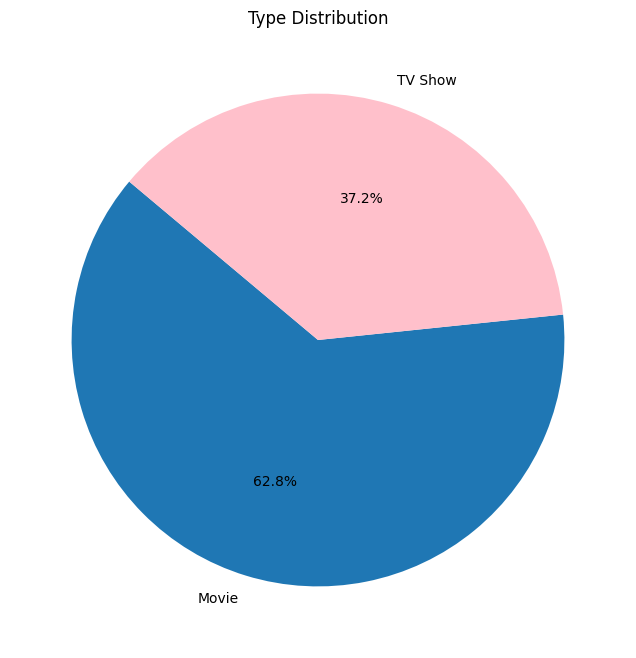

In [29]:
# Count the number of occurrences for each type
type_counts = df0['type'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['tab:blue', 'pink'])
plt.title('Type Distribution')
plt.show()

### 3.2 Rating

In [30]:
df0['rating'].describe()

count     9422
unique       7
top          R
freq      3947
Name: rating, dtype: object

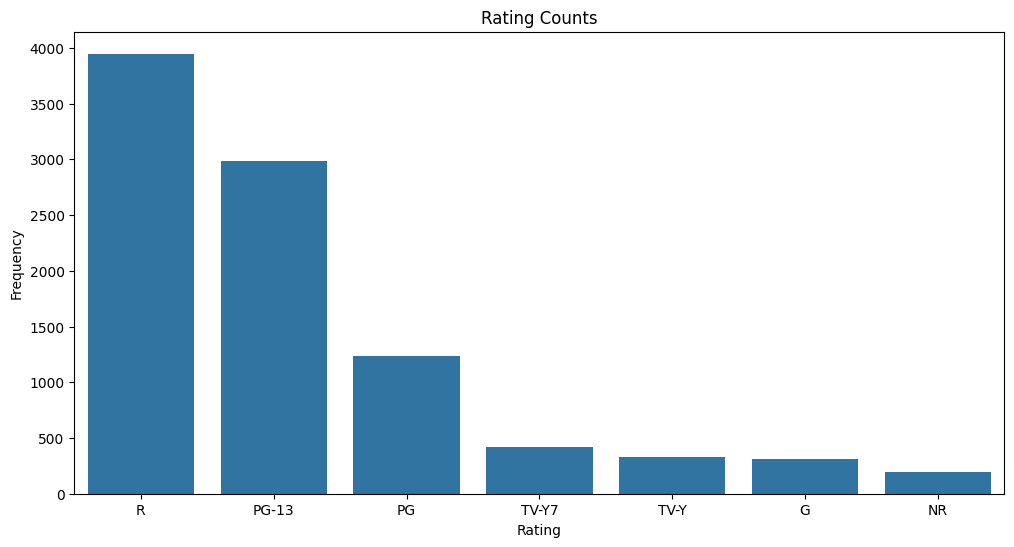

In [31]:
# Calculate the counts and sort in descending order
rating_counts = df0['rating'].value_counts().sort_values(ascending=False)

# Get the ordered list of categories (ratings)
ordered_ratings = rating_counts.index

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df0, order=ordered_ratings)
plt.title('Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

- The majority of films fall under the 'R' rating, denoting content intended for mature audiences, as designated by the TV Parental Guidelines.
- Following closely is the 'PG-13' rating, indicating content that may be inappropriate for children under 13.
- In third place is the widely embraced 'PG' rating, which means parental guidance suggested (Some material may not be suitable for children).


### 3.3 Country

In [32]:
df0['country'].describe()

count              9422
unique               75
top       United States
freq               3482
Name: country, dtype: object

In [33]:
df0_countries = pd.DataFrame(df0.country.value_counts().reset_index().values, columns = ['country', 'count'])
df0_countries

,country,count
0,United States,3482
1,India,1226
2,Other,1081
3,United Kingdom,529
4,Japan,371
...,...,...
70,West Germany,1
71,Venezuela,1
72,Bulgaria,1
73,Namibia,1


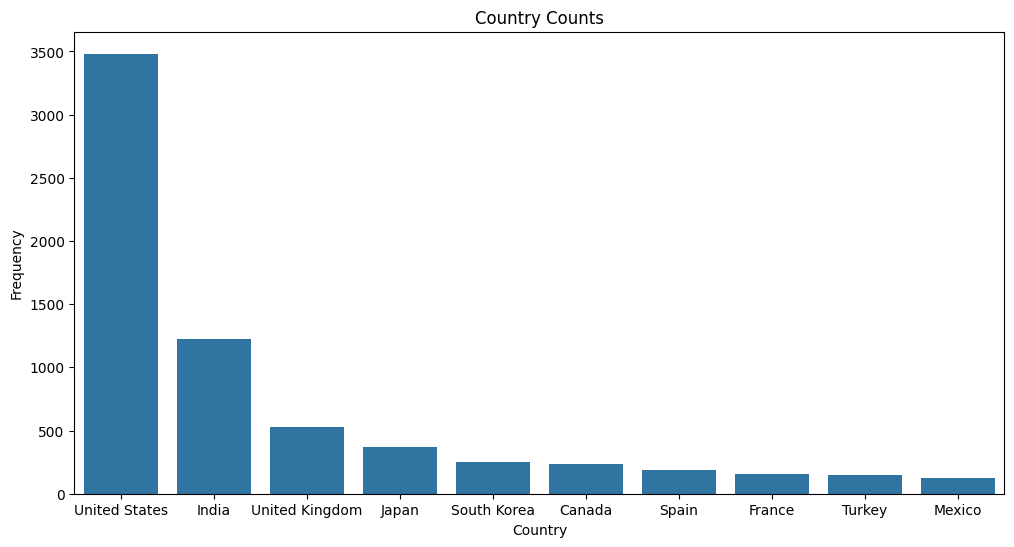

In [34]:
# Calculate the counts
countries_counts = df0['country'].value_counts()

# Step 1: Identify the top ten countries, excluding 'Other'
country_counts = df0['country'].value_counts()
top_countries = country_counts[country_counts.index != 'Other'].nlargest(10).index

# Filter the DataFrame to include only rows with the top 20 countries
df_top_10 = df0[df0['country'].isin(top_countries)]

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=df_top_10, order=top_countries)
plt.title('Country Counts')
plt.xlabel('Country')
plt.ylabel('Frequency')

plt.show()

### 3.4 Release Year

In [35]:
df0['release_year'].describe()

count    9422.000000
mean     2014.365209
std         8.753354
min      1925.000000
25%      2014.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

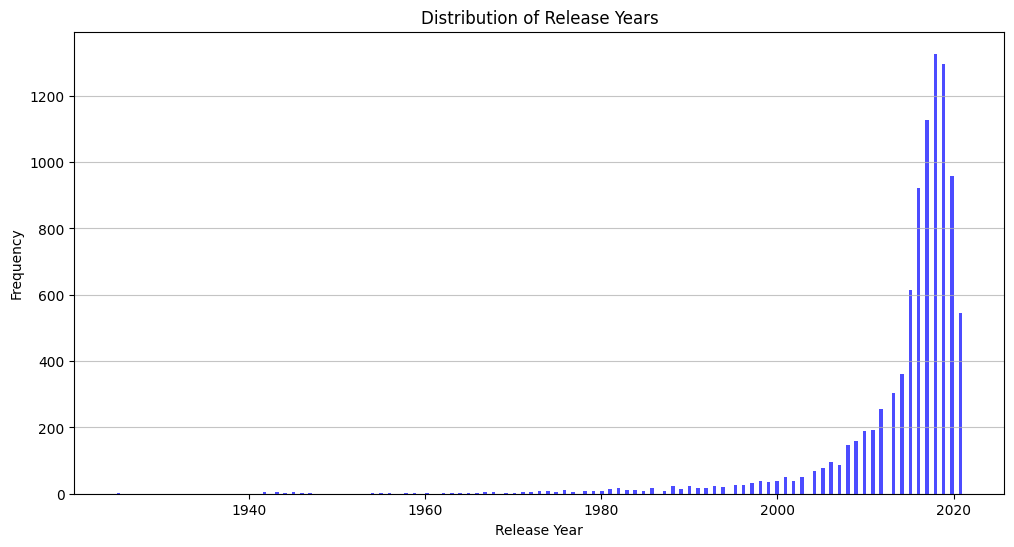

In [36]:
plt.figure(figsize=(12, 6))
plt.hist(df0['release_year'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

### 3.5 Duration

In [37]:
df0[df0['tv_show_season'] != -1]['tv_show_season'].describe()

count    3509.000000
mean        1.886292
std         1.658023
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: tv_show_season, dtype: float64

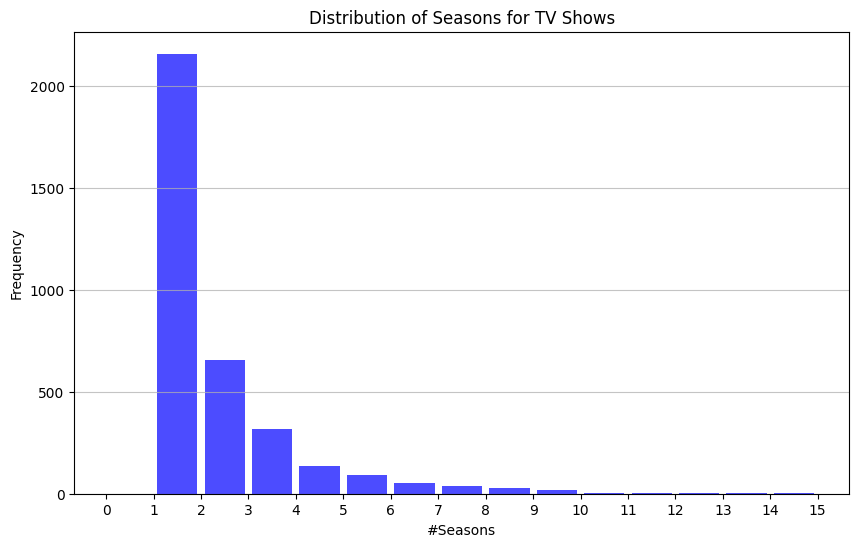

In [38]:
# For TV Shows

plt.figure(figsize=(10, 6))
plt.hist(df0['tv_show_season'], bins=range(16), color='blue', alpha=0.7, rwidth=0.85)  # Adjust bins
plt.title('Distribution of Seasons for TV Shows')
plt.xlabel('#Seasons')
plt.ylabel('Frequency')
plt.xticks(range(16))  # Set x-ticks to show every integer from 0 to 10
plt.grid(axis='y', alpha=0.75)

plt.show()

In [39]:
df0[df0['movie_min'] != -1]['movie_min'].describe()

count    5913.000000
mean       99.231524
std        29.468861
min         3.000000
25%        86.000000
50%        98.000000
75%       115.000000
max       312.000000
Name: movie_min, dtype: float64

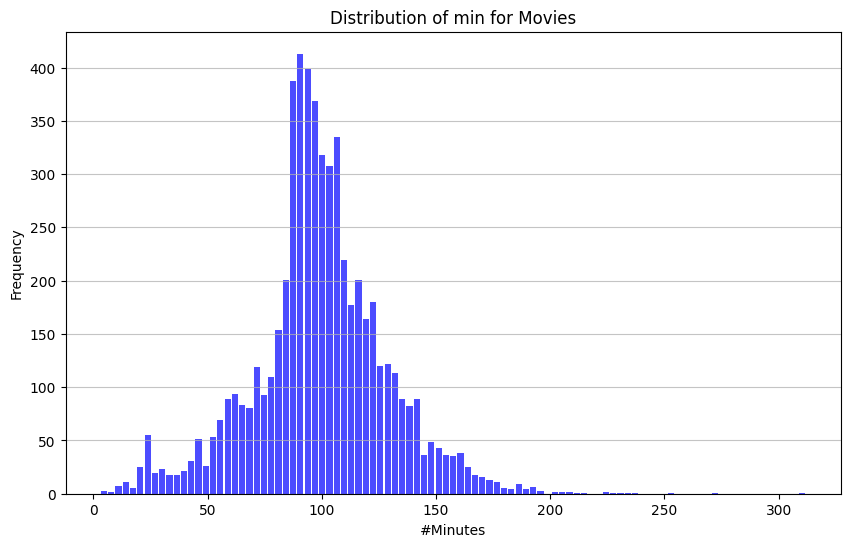

In [40]:
# Movies

# Filter out rows where 'movie_min' is -1
filtered_df = df0[df0['movie_min'] != -1]

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['movie_min'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Distribution of min for Movies')
plt.xlabel('#Minutes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

### 3.6 Tags

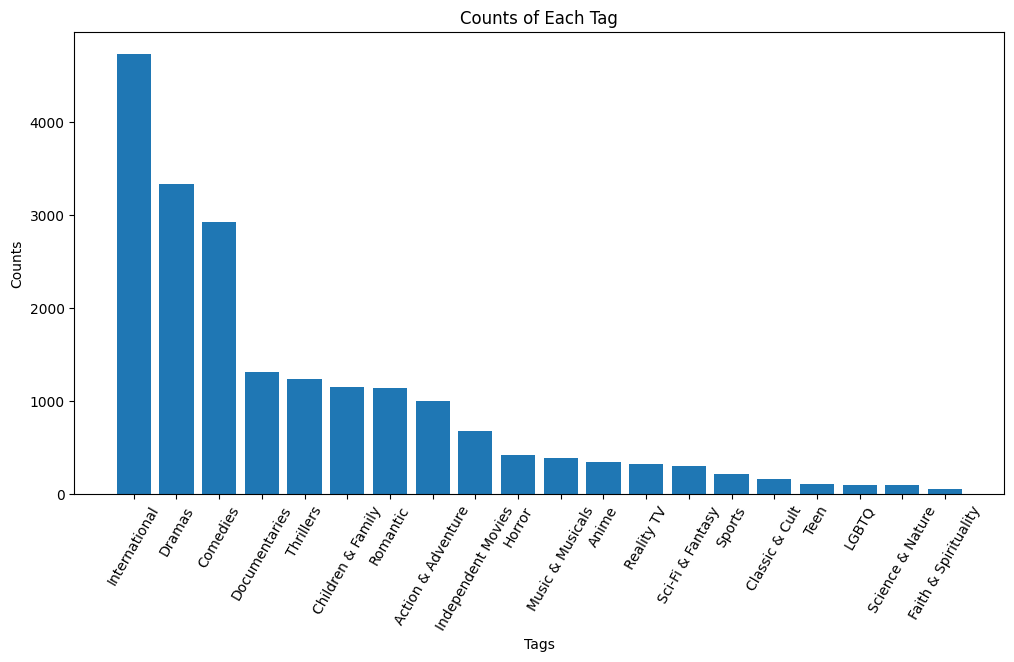

In [41]:
# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the size of the figure as needed
plt.bar(sorted_tag_counts.keys(), sorted_tag_counts.values())

# Add labels and title
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.title('Counts of Each Tag')
plt.xticks(rotation=60)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

### 3.7 Description

In [42]:
df0['sentiment_category'].describe()

count         9422
unique           3
top       Positive
freq          4510
Name: sentiment_category, dtype: object

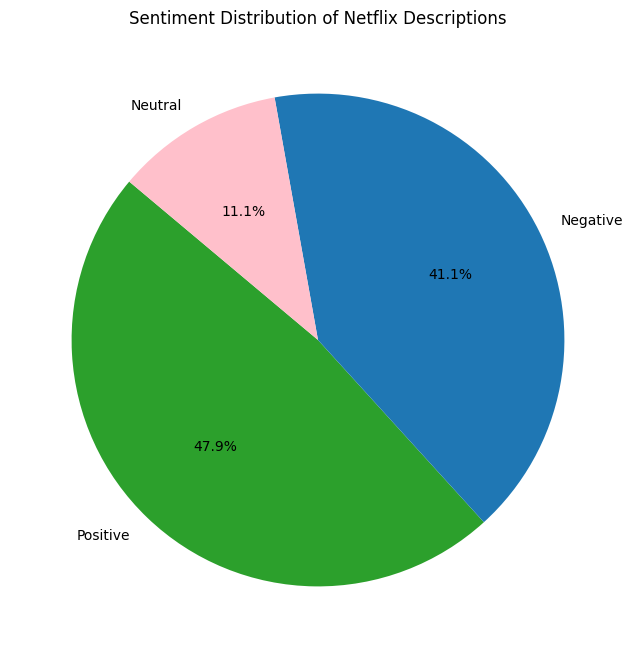

In [43]:
# Count the number of occurrences for each sentiment category
sentiment_counts = df0['sentiment_category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['tab:green', 'tab:blue', 'pink'])
plt.title('Sentiment Distribution of Netflix Descriptions')
plt.show()

### 3.8 Date Added

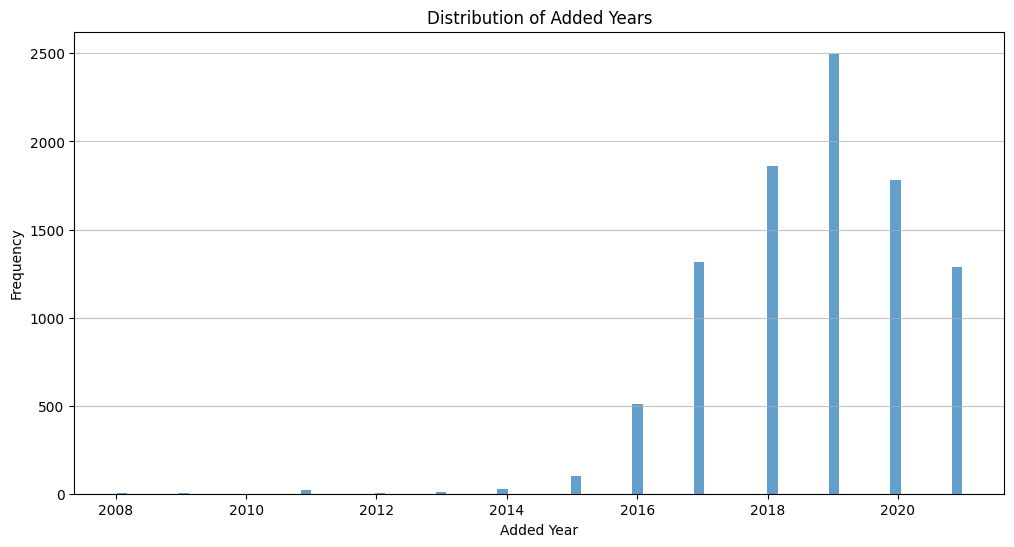

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(df0['added_year'], bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Distribution of Added Years')
plt.xlabel('Added Year')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

### 3.9 Relationship between Rating and other features

#### 3.9.1 Types and Rating

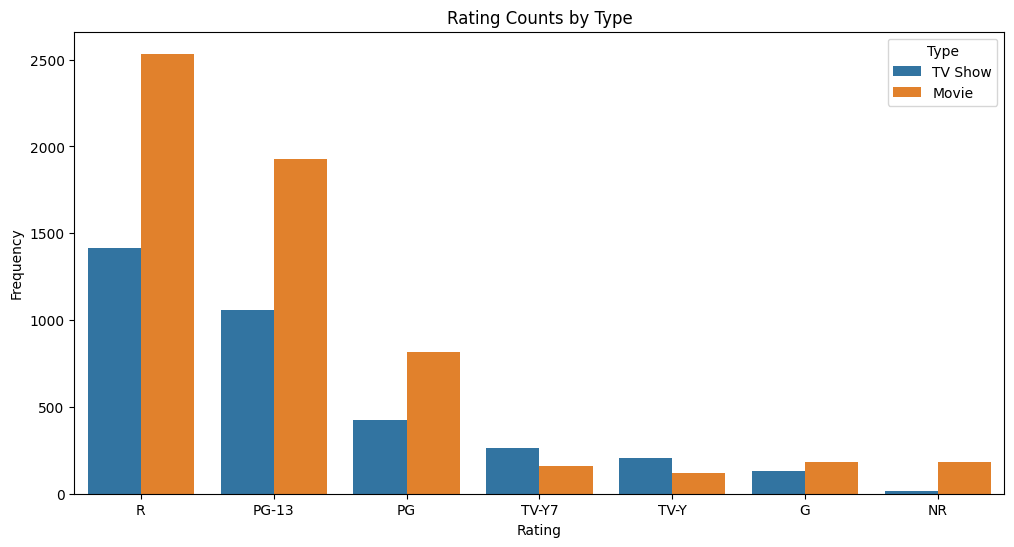

In [45]:
# Plotting
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='rating', data=df0, order=ordered_ratings, hue='type')
plt.title('Rating Counts by Type')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Get the current handles and labels
h, l = ax.get_legend_handles_labels()

# Set the legend with the current handles and labels
ax.legend(h, l, title='Type')

plt.show()

#### 3.9.2 Release year and Rating

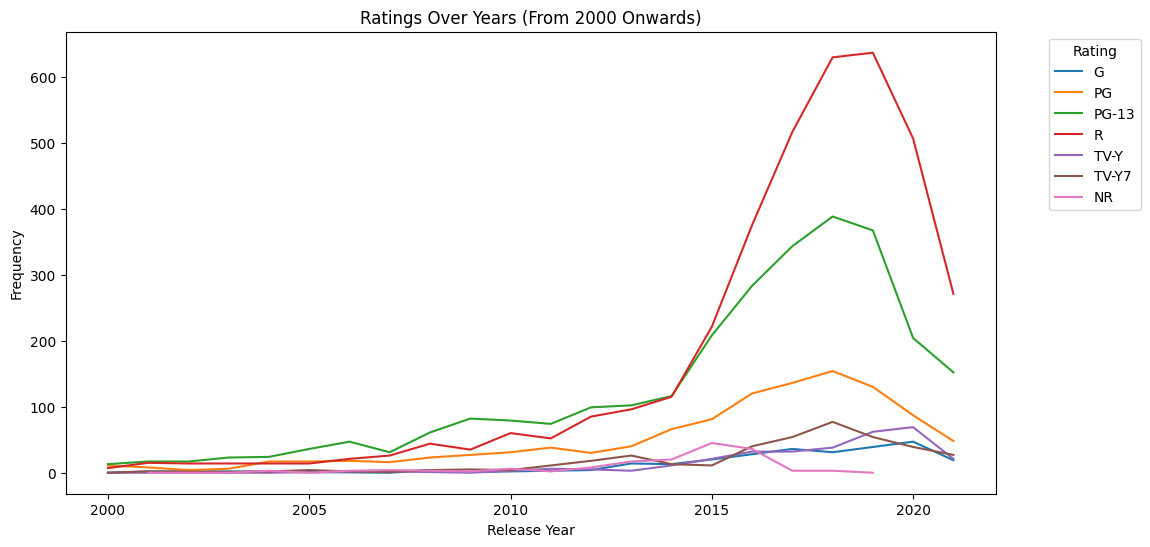

In [46]:
# Filter the DataFrame for release years starting from 2000
df_filtered = df0[df0['release_year'] >= 2000]

# Group the data by 'release_year' and 'rating', and calculate the count for each group
grouped_data = df_filtered.groupby(['release_year', 'rating']).size().reset_index(name='count')

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='release_year', y='count', hue='rating')

plt.title('Ratings Over Years (From 2000 Onwards)')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc=2)  # Adjust the legend position

plt.show()

#### 3.9.3 Countries and Rating

In [47]:
# # 原本嘗試的長條圖，因為每個國家總數差距過大，用絕對數字不合適，每個國家數量少的 rating 也幾乎都是 0，不需要顯示

# # Step 1: Identify the top ten countries, excluding 'Other'
# country_counts = df0['country'].value_counts()
# top_countries = country_counts[country_counts.index != 'Other'].nlargest(10).index

# # Step 2: Create a grid of plots
# fig, axes = plt.subplots(5, 2, figsize=(10, 12))  # 2 rows, 5 columns
# fig.suptitle('Rating Counts for Top 10 Countries')

# # Loop through the top ten countries and create a plot for each
# for i, country in enumerate(top_countries):
#     # Select the subplot
#     ax = axes[i // 2, i % 2]

#     # Filter data for the country
#     df_country = df0[df0['country'] == country]

#     # Plot the data
#     sns.countplot(x='rating', data=df_country, order=ordered_ratings, ax=ax)
#     ax.set_title(country)
#     ax.set_xlabel('Rating')
#     ax.set_ylabel('Frequency')
#     ax.tick_params(axis='x', rotation=60)  # Rotate the x-axis labels for each subplot

# # Adjust layout
# plt.tight_layout()
# plt.subplots_adjust(top=0.9)  # Adjust the top so that the suptitle does not overlap with subplots

# plt.show()

In [48]:
# # Step 1: Identify the top ten countries, excluding 'Other'
# country_counts = df0['country'].value_counts()
# top_countries = country_counts[country_counts.index != 'Other'].nlargest(10).index

# # Define a consistent color palette
# all_ratings = df0['rating'].value_counts().index
# colors = plt.cm.tab20.colors  # Using a colormap with enough colors
# color_dict = {rating: colors[i % len(colors)] for i, rating in enumerate(all_ratings)}
# color_dict['Other'] = 'gray'  # Assign a specific color for 'Other'

# # Step 2: Create a grid of plots
# fig, axes = plt.subplots(5, 2, figsize=(8, 12))  # 5 rows, 2 columns
# fig.suptitle('Top 5 Ratings in Top 10 Countries')

# # Loop through the top ten countries and create a pie chart for each
# for i, country in enumerate(top_countries):
#     # Select the subplot
#     ax = axes[i // 2, i % 2]

#     # Filter data for the country and get rating counts
#     df_country = df0[df0['country'] == country]
#     rating_counts = df_country['rating'].value_counts()

#     # Get top 5 ratings and aggregate others
#     top_5_ratings = rating_counts.nlargest(5)
#     other_count = rating_counts.iloc[5:].sum()
#     pie_data = pd.concat([top_5_ratings, pd.Series([other_count], index=['Other'])])
    
#     # Assign colors
#     pie_colors = [color_dict.get(rating, 'black') for rating in pie_data.index]

#     # Plot the pie chart
#     pie_data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=140, colors=pie_colors)
#     ax.set_ylabel('')  # Remove the y-label
#     ax.set_title(country)

# # Adjust layout
# plt.tight_layout()
# plt.subplots_adjust(top=0.95)  # Adjust the top so that the suptitle does not overlap with subplots

# plt.show()

#### 3.9.4 Duration and Rating

##### For TV Shows

In [49]:
# # Get unique ratings
# unique_ratings = df0['rating'].unique()

# # Create a grid of subplots
# fig, axes = plt.subplots(7, 2, figsize=(12, 24))  # 7 rows, 2 columns
# fig.suptitle('Distribution of Seasons for TV Shows by Rating (Relative Frequency)')

# # Initialize subplot index
# subplot_idx = 0

# # Loop through each rating and create a histogram only if there's data
# for rating in unique_ratings:
#     df_filtered = df0[(df0['rating'] == rating) & (df0['type'] == 'TV Show')]  # Assuming type 1 is for TV Shows

#     # Check if there's data
#     if not df_filtered.empty:
#         # Select the subplot
#         ax = axes[subplot_idx // 2, subplot_idx % 2]
        
#         # Calculate weights for each season to convert counts to percentages
#         weights = np.ones_like(df_filtered['tv_show_season']) / len(df_filtered['tv_show_season'])

#         ax.hist(df_filtered['tv_show_season'], bins=range(16), weights=weights, color='blue', alpha=0.7, rwidth=0.85)
#         ax.set_title(f'Distribution for Rating: {rating}')
#         ax.set_xlabel('#Seasons')
#         ax.set_ylabel('Relative Frequency')
#         ax.set_xticks(range(16))
#         ax.set_ylim(0.0, 1.2)  # Set y-axis range
#         ax.grid(axis='y', alpha=0.75)

#         # Increment subplot index
#         subplot_idx += 1

# # Hide any unused subplots
# for i in range(subplot_idx, 14):
#     fig.delaxes(axes[i // 2, i % 2])

# # Adjust layout
# plt.tight_layout()
# plt.subplots_adjust(top=0.95)

# plt.show()

In [50]:
# # Function to only show percentages above a certain threshold
# def autopct_format(values):
#     def my_format(pct):
#         total = sum(values)
#         val = int(round(pct*total/100.0))
#         if val > 0:
#             return '{p:.0f}%'.format(p=pct)
#         return ''
#     return my_format
    
# # Get unique ratings
# unique_ratings = df0['rating'].unique()

# # Define a more diverse color palette
# color_palette = plt.cm.tab20.colors

# # Create a grid of subplots
# fig, axes = plt.subplots(7, 2, figsize=(12, 24))  # 7 rows, 2 columns
# fig.suptitle('Distribution of TV Show Seasons by Rating')

# subplot_idx = 0  # Initialize subplot index

# # Loop through each rating and create a pie chart only if there's data
# for rating in unique_ratings:
#     df_filtered = df0[(df0['rating'] == rating) & (df0['type'] == 'TV Show')]  # Assuming type 1 is for TV Shows

#     if not df_filtered.empty:
#         ax = axes[subplot_idx // 2, subplot_idx % 2]

#         # Calculate the distribution of seasons, aggregating seasons >= 5
#         season_counts = df_filtered['tv_show_season'].apply(lambda x: x if x < 5 else '5+').value_counts()
#         season_counts = season_counts.reindex([1, 2, 3, 4, '5+'], fill_value=0)

#         # Plot the pie chart with the diverse color palette
#         season_counts.plot(kind='pie', ax=ax, colors=color_palette[:len(season_counts)],
#                            autopct=autopct_format(season_counts), startangle=140)
#         ax.set_ylabel('')  # Remove the y-label
#         ax.set_title(f'Distribution for Rating: {rating}')

#         subplot_idx += 1

# # Hide any unused subplots
# for i in range(subplot_idx, 14):
#     fig.delaxes(axes[i // 2, i % 2])

# plt.tight_layout()
# plt.subplots_adjust(top=0.95)

# plt.show()

##### For Movies

In [51]:
# # Filter out rows where 'movie_min' is -1
# filtered_df = df0[df0['movie_min'] != -1]

# # Get unique ratings
# unique_ratings = filtered_df['rating'].unique()

# # Create a grid of subplots
# fig, axes = plt.subplots(5, 2, figsize=(12, 20))  # 5 rows, 2 columns
# fig.suptitle('Distribution of Minutes for Movies by Rating')

# # Loop through each rating and create a histogram
# for i, rating in enumerate(unique_ratings):
#     ax = axes[i // 2, i % 2]

#     # Filter data for the specific rating
#     df_rating = filtered_df[filtered_df['rating'] == rating]

#     # Plot the data
#     ax.hist(df_rating['movie_min'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
#     ax.set_title(f'Distribution for Rating: {rating}')
#     ax.set_xlabel('#Minutes')
#     ax.set_ylabel('Frequency')
#     ax.grid(axis='y', alpha=0.75)

# # Hide any unused subplots
# for j in range(i+1, 10):
#     fig.delaxes(axes[j // 2, j % 2])

# # Adjust layout
# plt.tight_layout()
# plt.subplots_adjust(top=0.95)

# plt.show()

#### 3.9.4 Tags and Rating

In [52]:
# # Define your ratings groups
# ratings_groups = df0['rating'].unique()

# # Calculate counts for each tag and rating
# tag_counts = {tag: {rating: df0[(df0[tag] == 1) & (df0['rating'] == rating)].shape[0] 
#                     for rating in ratings_groups} 
#               for tag in new_tags.keys()}

# # Calculate total counts for each tag
# total_counts = {tag: sum(ratings.values()) for tag, ratings in tag_counts.items()}

# # Sort tags by total counts
# sorted_tags = sorted(total_counts, key=total_counts.get, reverse=True)

# # Prepare data for stacked bar chart
# ratings_data = {rating: [tag_counts[tag][rating] for tag in sorted_tags] for rating in ratings_groups}

# # Plotting
# plt.figure(figsize=(12, 6))

# # Bottom of each segment in the bar
# bottom = np.zeros(len(sorted_tags))

# # Loop through each rating and stack them
# for rating in ratings_groups:
#     plt.bar(sorted_tags, ratings_data[rating], bottom=bottom, label=rating)
#     bottom += np.array(ratings_data[rating])

# plt.xlabel('Tags')
# plt.ylabel('Counts')
# plt.title('Counts of Each Tag by Rating')
# plt.xticks(rotation=60, ha="right")
# plt.legend(title='Rating')

# plt.show()

#### 3.9.5 Description and Rating

In [53]:
# #convert string format to categorical
# df0['rating'] = pd.Categorical(df0['rating'])

# # Plot a boxplot to visualize the relationship between sentiment and rating
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='rating', y='sentiment', data=df0, order=df0['rating'].cat.categories)
# plt.title('Relationship between Sentiment and Rating Categories')
# plt.xlabel('Rating Categories')
# plt.ylabel('Sentiment Score')
# plt.show()

## 4. Analysis

### 4.1 Test the independency between "rating" and "type"

Hypothesis

$\begin{cases}
H_0: \text{There is no difference between rating distribution of different type.}\\
H_1: \text{There ....}\\
\end{cases}$

We need to do assumption check:
- Random Sample (Can not be tested through functions, it's about data collection)
- Independent samples (In this case, it's about data collection method as well, can't be tested.)
- Mutually exclusive groups

In [54]:
# Check: Mutually Exclusive

# Check for duplicates based on a unique identifier
duplicates = df0.duplicated(subset='id', keep=False)

# Report if there are any duplicates
if duplicates.any():
    print("There are subjects included in more than one group.")
    # You could also list the duplicated entries
    print(df0[duplicates])
else:
    print("All subjects are in mutually exclusive groups.")

All subjects are in mutually exclusive groups.


The assumption is met, let's do the chi-squared test:

In [55]:
# Test: Chi-squared

contingency_table = pd.crosstab(df0['rating'], df0['type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared: 290.4832844251632
P-value: 8.943111919524088e-60
Degrees of Freedom: 6
Expected frequencies:
[[ 195.17544046  115.82455954]
 [ 123.63203142   73.36796858]
 [ 776.93631925  461.06368075]
 [1871.42496285 1110.57503715]
 [2477.03364466 1469.96635534]
 [ 204.58904691  121.41095309]
 [ 264.20855445  156.79144555]]


As we can see, p-value < 0.05, which means that we can reject the hypothesis and indicate that there's relationship between 'rating' and 'type'.

### 4.2 Test whether the frequency of shows or movies in rating ＝ 'R' through release year is dependent to time. (?)

In [56]:
# 探究R类随时间变化
grouped_data_R = grouped_data[grouped_data['rating'] == 'R']
grouped_data_R = grouped_data_R.drop(columns = ['rating'])
grouped_data_R

,release_year,count
3,2000,8
10,2001,16
15,2002,15
19,2003,15
26,2004,15
33,2005,15
38,2006,22
44,2007,27
51,2008,45
58,2009,36


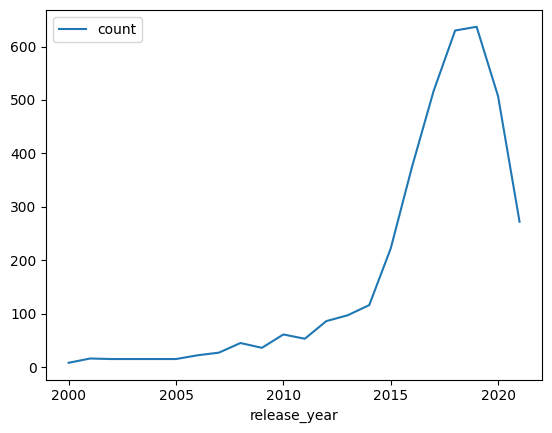

In [57]:
grouped_data_R.set_index('release_year', inplace = True)
grouped_data_R.plot()
plt.show()

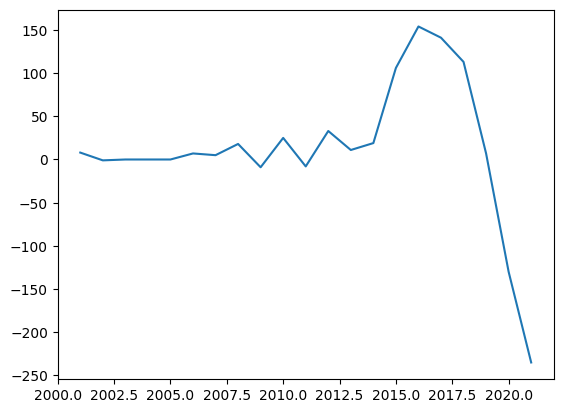

In [58]:
grouped_data_R['Differenced'] = grouped_data_R['count'] - grouped_data_R['count'].shift(1)
plt.plot(grouped_data_R['Differenced'])

plt.show()

In [59]:
# Define the get_stationarity function
def get_stationarity(timeseries, varname):
    """Title: get_stationarity
    Function for testing whether time series data is stationary.
    Args:
    timeseries - DataFrame containing time series
    varname - Name of the column containing the series values
    """
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Dickey–Fuller test:
    result = adfuller(timeseries[varname])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

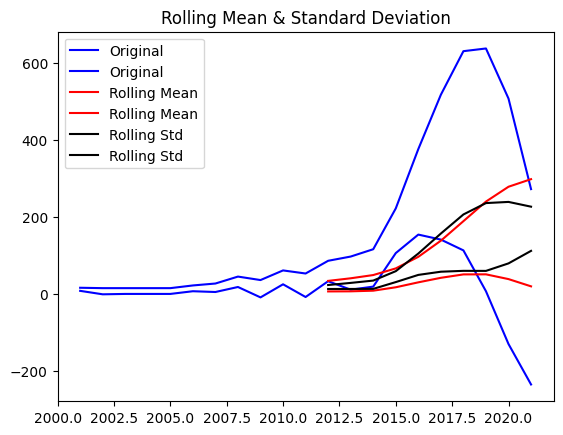

ADF Statistic: 1.9860446814573518
p-value: 0.9986545410598799
Critical Values:
	1%: -4.137829282407408
	5%: -3.1549724074074077
	10%: -2.7144769444444443


In [60]:
grouped_data_R = grouped_data_R.dropna()
get_stationarity(grouped_data_R, 'Differenced')

综合来看，由于ADF统计量的值较小，p值很小，而且ADF统计量小于临界值，可以得出结论：时间序列数据在很长一段时间是平稳的，除去样本量急速攀升的2018和2019年。

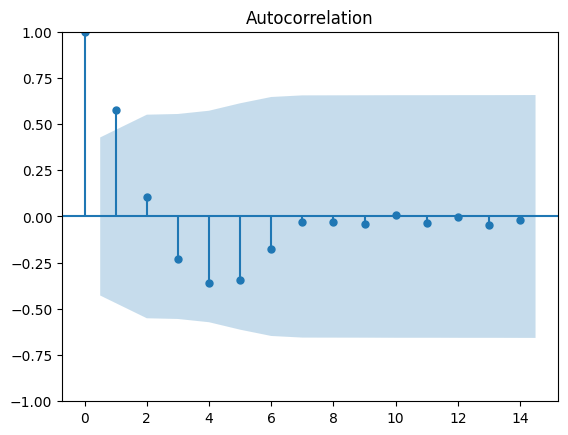

In [61]:
plot_acf(grouped_data_R['Differenced'].dropna())
plt.show()

在2000-2020这20年间，R类分级作品的数量和时间并无直接或周期性关系，在大多数年份是维稳的。故2018和2019这两年R级作品数量的攀升与事件无关。

同理可得，NR与TV14这两个分级的作品数量的上升也与时间无直接联系。

### 4.3 Independency between Country and Rating

Hypothesis

$\begin{cases}
H_0: \text{There is no difference in rating distribution among different countries.}\\
H_1: \text{There ....}\\
\end{cases}$

The assumption is already checked in 4.1. 

Do chi-squared test:

In [62]:
# Test: Chi-squared

contingency_table = pd.crosstab(df0['rating'], df0['country'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared: 2012.5528479153259
P-value: 9.65389154738579e-198
Degrees of Freedom: 444
Expected frequencies:
[[2.17851836e+00 3.86191891e+00 1.65039270e-01 9.90235619e-02
  3.30078540e-02 3.63086394e-01 3.00371471e+00 3.30078540e-02
  3.30078540e-02 3.30078540e-02 7.82286139e+00 4.95117809e-01
  2.83867544e+00 1.48535343e+00 6.60157079e-02 3.30078540e-02
  6.93164933e-01 3.30078540e-02 3.82891106e+00 9.90235619e-02
  5.05020166e+00 3.30078540e-02 2.57461261e+00 9.90235619e-02
  3.30078540e-02 2.07949480e+00 1.32031416e-01 1.98047124e-01
  4.04676290e+01 2.83867544e+00 5.28125663e-01 6.27149225e-01
  1.71640841e+00 1.22459138e+01 6.60157079e-02 9.90235619e-02
  2.31054978e-01 5.94141371e-01 3.30078540e-02 1.02324347e+00
  3.30078540e-02 4.12598174e+00 3.30078540e-02 3.30078540e-02
  8.25196349e-01 4.29102101e-01 3.66387179e+00 4.62109955e-01
  3.56814901e+01 6.60157079e-01 1.65039270e-01 2.97070686e+00
  8.91212057e-01 3.30078540e-01 7.59180641e-01 2.97070686e-01
  3.30078540e-02 9.5722

Since p-value < 0.05, we can reject the hypothesis. That is, there's relationship between rating and countries.

For further exploration, we wanna know among these 10 selected top countries in data amount, whether there's difference in rating distribution between Asian and Non-Asian country.

Hypothesis

$\begin{cases}
H_0: \text{There is no difference in rating distribution between Asian and Non-Asian countries.}\\
H_1: \text{There ....}\\
\end{cases}$

In [63]:
# identify whether the country in top 10 is Asian country

df_top_10['isAsian'] = df_top_10['country'].apply(lambda x: 1 if x in ['Japan', 'South Korea', 'India'] else 0)
df_top_10

/var/folders/5f/81w1nd811xb2c2h1xybx3s540000gn/T/ipykernel_35020/115892183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['isAsian'] = df_top_10['country'].apply(lambda x: 1 if x in ['Japan', 'South Korea', 'India'] else 0)


,type,country,date_added,release_year,rating,listed_in,description,id,added_year,tv_show_season,...,LGBTQ,Sports,Teen,sentiment,sentiment_category,type_mapped,rating_mapped,sentiment_cat_mapped,country_mapped,isAsian
1,Movie,Mexico,2016-12-23,2016,R,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,2016,-1,...,0,0,0,-0.7096,Negative,2,1,2,2,0
3,Movie,United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",4,2017,-1,...,0,0,0,-0.5574,Negative,2,2,2,4,0
4,Movie,United States,2020-01-01,2008,PG-13,Dramas,A brilliant group of students become card-coun...,5,2020,-1,...,0,0,0,0.3818,Positive,2,2,1,4,0
5,TV Show,Turkey,2017-07-01,2016,R,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,6,2017,1,...,0,0,0,-0.5499,Negative,1,1,2,5,0
7,Movie,United States,2019-11-01,1997,R,Dramas,After one of his high school students attacks ...,8,2019,-1,...,0,0,0,-0.6712,Negative,2,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,TV Show,United States,2017-09-04,2016,PG-13,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy","Trapped in adolescent bodies, feuding vampire ...",9417,2017,8,...,0,0,0,-0.3818,Negative,1,2,2,4,0
5325,Movie,United States,2017-08-15,2017,R,"Music & Musicals, Stand-Up Comedy",Country music star Brad Paisley hosts a night ...,9418,2017,-1,...,0,0,0,0.4939,Positive,2,1,1,4,0
5375,Movie,United States,2017-07-14,2017,TV-Y7,"Children & Family Movies, Comedies",Champion truck-racing dog Buddy and his best f...,9419,2017,-1,...,0,0,0,0.8720,Positive,2,7,1,4,0
5397,TV Show,United Kingdom,2017-07-01,2015,TV-Y,"British TV Shows, Kids' TV",Simple songs mix with colorful animation to te...,9420,2017,1,...,0,0,0,0.0000,Neutral,1,6,3,11,0


Do chi-squared test

In [64]:
# Test: Chi-squared

contingency_table = pd.crosstab(df_top_10['rating'], df_top_10['isAsian'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared: 493.59727016488296
P-value: 2.0132121334907094e-103
Degrees of Freedom: 6
Expected frequencies:
[[ 154.3519678    58.6480322 ]
 [ 116.66979726   44.33020274]
 [ 675.38044126  256.61955874]
 [1520.33064997  577.66935003]
 [2063.82349434  784.17650566]
 [ 139.85882528   53.14117472]
 [ 190.58482409   72.41517591]]


Since p-value < 0.05, we can reject the hypothesis. That is, there's relationship between rating and whether it's an Asian country.

### 4.4 Independency between Duration and Rating

In [65]:
# Separate movies and TV shows:
df_movies = df0[df0['movie_min'] != -1]
df_tvShows = df0[df0['tv_show_season'] != -1]

#### For TV Shows

Hypothesis

$\begin{cases}
H_0: \text{There is no difference in number of seasons distribution among different rating group.}\\
H_1: \text{There ....}\\
\end{cases}$

Do chi-squared test

In [66]:
# Test: Chi-squared

contingency_table = pd.crosstab(df_tvShows['rating'], df_tvShows['tv_show_season'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-squared: 209.0374916170683
P-value: 2.2446438000713409e-10
Degrees of Freedom: 96
Expected frequencies:
[[7.98746082e+01 2.41920775e+01 1.17070390e+01 5.00142491e+00
  3.44542605e+00 2.00056996e+00 1.40780849e+00 1.07438017e+00
  5.92761471e-01 1.85237960e-01 1.11142776e-01 7.40951838e-02
  1.11142776e-01 3.70475919e-02 1.11142776e-01 3.70475919e-02
  3.70475919e-02]
 [1.04451411e+01 3.16357937e+00 1.53092049e+00 6.54032488e-01
  4.50555714e-01 2.61612995e-01 1.84098034e-01 1.40495868e-01
  7.75149615e-02 2.42234255e-02 1.45340553e-02 9.68937019e-03
  1.45340553e-02 4.84468510e-03 1.45340553e-02 4.84468510e-03
  4.84468510e-03]
 [2.60514107e+02 7.89033913e+01 3.81829581e+01 1.63123397e+01
  1.12373896e+01 6.52493588e+00 4.59162154e+00 3.50413223e+00
  1.93331433e+00 6.04160730e-01 3.62496438e-01 2.41664292e-01
  3.62496438e-01 1.20832146e-01 3.62496438e-01 1.20832146e-01
  1.20832146e-01]
 [6.49442006e+02 1.96700199e+02 9.51872328e+01 4.06654317e+01
  2.80139641e+01 1.62661727e+01 

Since p-value < 0.05, we can reject the hypothesis. That is, there's relationship between rating and number of seasons for TV shows.

#### For Movies

Hypothesis

$\begin{cases}
H_0: \text{There is no difference in duration of movies among different rating group.}\\
H_1: \text{There ....}\\
\end{cases}$

For ANOVA test, we need to check the following assumptions:
- Samples are independent (Already checked in previous part.)
- Population variances are equal
- Sample residuals are normally distributed

In [67]:
# Check: Equal Variance (Levene’s test)
df_R = []
for rating in unique_ratings:
    df = df_movies[df_movies['rating'] == rating]
    df_R.append(df['movie_min'])
    
stat, p = stats.levene(*df_R)
print(p)


1.3923743123791986e-15


Since p-value < 0.05, it indicates that the variance of seven movie duration distributions are not equal. (violation!)

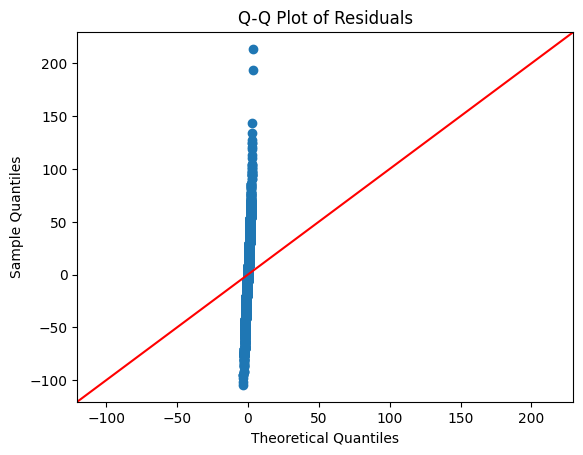

Shapiro-Wilk Test: Statistics=0.9743614196777344, p-value=2.6840041353426976e-31


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [68]:
# Check: Normally distributed residuals

# Assuming df is your DataFrame with columns 'min' (continuous) and 'rating' (categorical)
model = ols('movie_min ~ C(rating)', data=df_movies).fit()

# Extracting residuals
residuals = model.resid

# Checking for normality visually: Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Checking for normality statistically: Shapiro-Wilk Test
stat, p = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p}')

Since p-value < 0.05, it does not meet the assumption that residuals are normally distributed. (violation!) 

Let's do ANOVA test

In [69]:
# Test: ANOVA

result = stats.f_oneway(*df_R)
print(result)

F_onewayResult(statistic=195.40746430075808, pvalue=6.963008215713045e-228)


Since p-value < 0.05, we can reject the hypothesis. That is, there's relationship between rating and duration for Movies.

### 4.5 Relationship between Sentiment and Rating

Hypothesis

$\begin{cases}
H_0: \text{There is no difference in sentiment among different rating group.}\\
H_1: \text{There ....}\\
\end{cases}$

For ANOVA test, we need to check the following assumptions:
- Samples are independent (Already checked in previous part.)
- Population variances are equal
- Sample residuals are normally distributed

In [70]:
# Check: Equal Variance (Levene’s test)

df_R = []
for rating in unique_ratings:
    df = df0[df0['rating'] == rating]
    df_R.append(df['sentiment'])
    
stat, p = stats.levene(*df_R)
print(p)

4.2990176933109224e-38


Since p-value < 0.05, it indicates that the variance of seven sentiment distributions are not equal. (violation!)

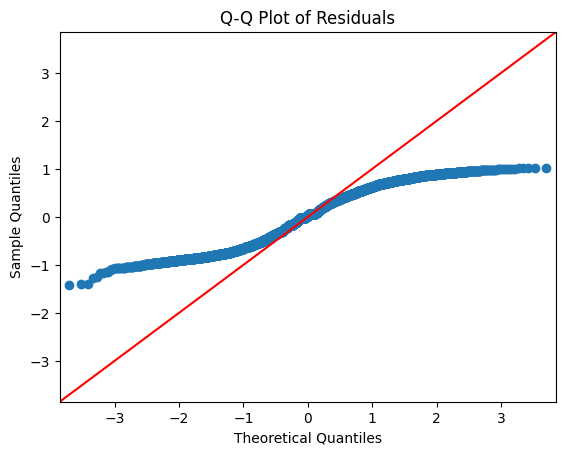

Shapiro-Wilk Test: Statistics=0.9581156373023987, p-value=1.401298464324817e-45


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [71]:
# Check: Normally distributed residuals

# Assuming df is your DataFrame with columns 'min' (continuous) and 'rating' (categorical)
model = ols('sentiment ~ C(rating)', data=df0).fit()

# Extracting residuals
residuals = model.resid

# Checking for normality visually: Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Checking for normality statistically: Shapiro-Wilk Test
stat, p = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p}')

Since p-value < 0.05, it does not meet the assumption that residuals are normally distributed. (violation!) 

We still work on ANOVA test:

In [72]:
# Test: ANOVA

result = stats.f_oneway(*df_R)
print(result)

F_onewayResult(statistic=89.3229018919525, pvalue=2.1134415957683598e-109)


Since p-value < 0.05, we can reject the hypothesis. That is, there's relationship between rating and sentiment.

### 4.6 Relationship between 20 kinds of tags and Rating (Prediction)
- 有兩種方向：
    1. 分析 tag 跟 rating 之間有無關係（可用 prediction model 的係數來判斷）
    2. 直接將 rating 設為應變量， fit a regression model